Install the required packages using the following commands:

```bash
pip install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu121
pip install --upgrade diffusers[torch] transformers accelerate --upgrade
```


100%|██████████| 1/1 [00:00<00:00, 17.43it/s]


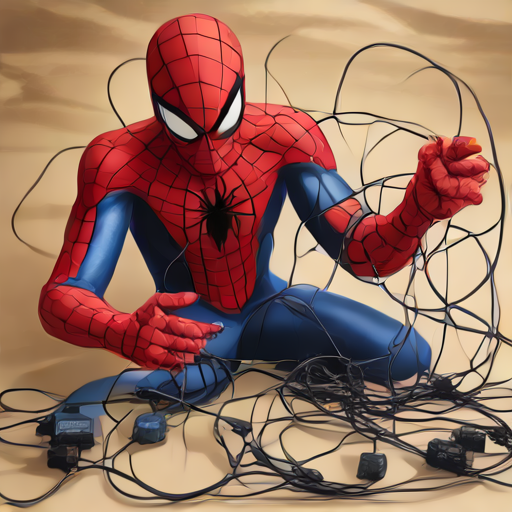

In [11]:
from diffusers import AutoPipelineForText2Image
import torch

pipe = AutoPipelineForText2Image.from_pretrained(
    "stabilityai/sdxl-turbo",
    torch_dtype=torch.float16,
    variant="fp16",
)
pipe.safety_checker = None
pipe.requires_safety_checker = False
pipe.to("cuda")

prompt = "spiderman with a web of usb cords with various kinds of plugs coming out of his hands"

pipe(prompt=prompt, num_inference_steps=1, guidance_scale=0.0).images[0]

100%|██████████| 1/1 [00:00<00:00, 16.39it/s]


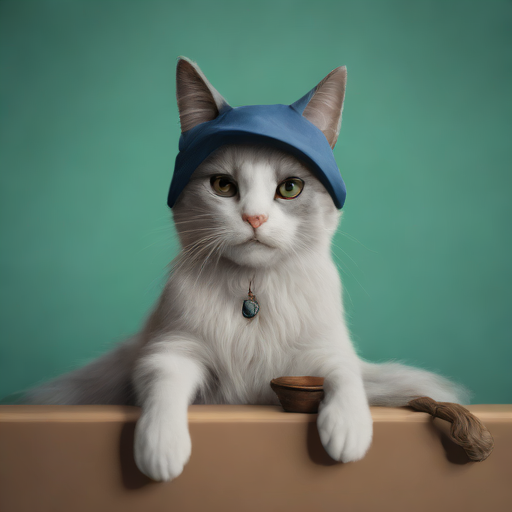

In [3]:
from diffusers import AutoPipelineForImage2Image
from diffusers.utils import load_image
import torch

pipe = AutoPipelineForImage2Image.from_pretrained(
    "stabilityai/sdxl-turbo", torch_dtype=torch.float16, variant="fp16"
)
pipe.to("cuda")

init_image = load_image(
    "https://huggingface.co/datasets/huggingface/documentation-images/resolve/main/diffusers/cat.png"
).resize((512, 512))

prompt = "cat wizard, gandalf, lord of the rings, detailed, fantasy, cute, adorable, Pixar, Disney, 8k"

pipe(
    prompt, image=init_image, num_inference_steps=2, strength=0.5, guidance_scale=0.0
).images[0]

In [1]:
from diffusers import AutoPipelineForText2Image
import torch
import os


class IMG:
    def __init__(self, model="stabilityai/sdxl-turbo"):
        if not os.path.exists("outputs"):
            os.makedirs("outputs")
        device = "cuda" if torch.cuda.is_available() else "cpu"
        pipe = AutoPipelineForText2Image.from_pretrained(
            model, torch_dtype=torch.float16, variant="fp16"
        ).to(device)
        pipe.safety_checker = None
        pipe.requires_safety_checker = False
        # pipe.enable_freeu(s1=0.9, s2=0.2, b1=1.3, b2=1.4)
        self.pipe = pipe

    def generate_image(
        self, prompt, negative_prompt, num_inference_steps, guidance_scale
    ):
        return self.pipe(
            prompt=prompt,
            negative_prompt=negative_prompt,
            num_inference_steps=num_inference_steps,
            guidance_scale=guidance_scale,
        ).images[0]

c:\Users\josh\AppData\Local\Programs\Python\Python310\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
c:\Users\josh\AppData\Local\Programs\Python\Python310\lib\site-packages\diffusers\utils\outputs.py:63: UserWarning: torch.utils._pytree._register_pytree_node is deprecated. Please use torch.utils._pytree.register_pytree_node instead.
  torch.utils._pytree._register_pytree_node(


100%|██████████| 1/1 [00:00<00:00, 16.79it/s]


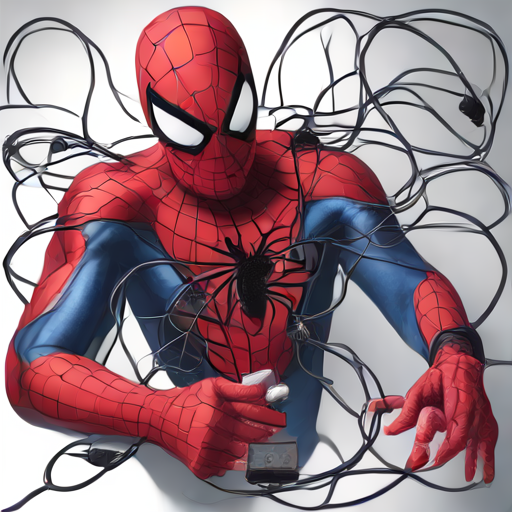

In [13]:
sd = IMG(model="stabilityai/sdxl-turbo")
sd.generate_image(
    prompt="spiderman with a web of usb cords with various kinds of plugs coming out of his hands",
    negative_prompt="spiderman with a web of usb cords with various kinds of plugs coming out of his hands",
    num_inference_steps=1,
    guidance_scale=0.1,
)

The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ["close - up with a sharp focus lens to capture the texture of the cables and spiderman's suit details. lighting : ambient city lights with a focus on neon signage reflecting off the cables."]
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ["close - up with a sharp focus lens to capture the texture of the cables and spiderman's suit details. lighting : ambient city lights with a focus on neon signage reflecting off the cables."]
100%|██████████| 2/2 [00:00<00:00,  7.04it/s]


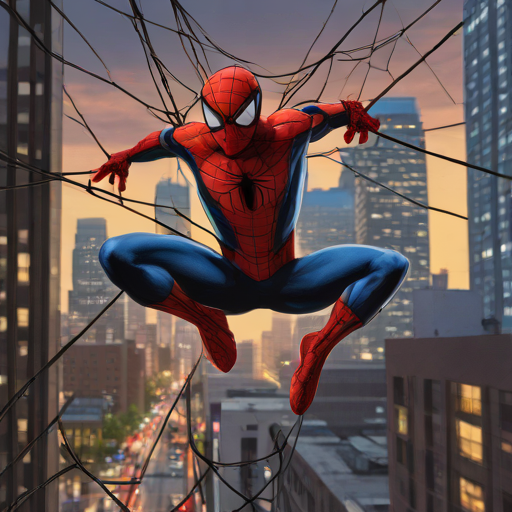

In [81]:
sd.generate_image(
    prompt="Digital illustration, Spiderman in a dynamic pose entangled in a web of computer power cables, set against a backdrop of a bustling modern city skyline at dusk. The cables mimic the complexity and chaos of a spider's web, intricately woven and detailed. Art style: comic book with a touch of realism. Inspired by Marvel Comics and urban photography. Camera shot: medium close-up with a sharp focus lens to capture the texture of the cables and Spiderman's suit details. Lighting: ambient city lights with a focus on neon signage reflecting off the cables.",
    negative_prompt="low resolution, grainy, distorted, more than 2 arms",
    num_inference_steps=2,
    guidance_scale=0.0,
)